### *** IMPORTING LIBRARIES AND DATA

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating a path to import data
path = r'C:\Users\jnyam\Documents\Top Companies'

In [3]:
# Importing data
df = pd.read_csv(os.path.join(path, 'Data','Original Data', 'choco.csv'))

### *** CLEANING DATA 

In [4]:
# Checking head of data
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [5]:
# Checking missing values
df.isnull().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [6]:
# Addressing missing values
df_nan=df[df['num_ingredients'].isnull()==True]

In [7]:
df_nan

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
85,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70.0,NaN,NaN,"raisins, pungent",3.00
86,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70.0,NaN,NaN,"few grits, blackcherry, licorice",3.50
164,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100.0,NaN,NaN,"very nutty, very bitter",1.75
293,81,Bonnat,France,2006,Blend,One Hundred,100.0,NaN,NaN,"acidic, bitter, dry",1.50
323,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100.0,NaN,NaN,"cardboard, very bitter, floral",1.50
...,...,...,...,...,...,...,...,...,...,...,...
2424,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",100.0,NaN,NaN,"bland, mild fruit, strong bitter",2.00
2425,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",90.0,NaN,NaN,"some fruit, strong bitter",2.00
2426,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",75.0,NaN,NaN,"cocoa,earthy,very astringent",3.00
2447,733,Whittakers,New Zealand,2011,Ghana,Ghana,72.0,NaN,NaN,"sticky, dry, vanilla dominates",2.50


In [8]:
# dropping all 87 missing values because it is only 0.03% of dataset
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

id                  0
manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
dtype: int64

In [10]:
# Checking mixed data types
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

In [11]:
# Checking duplicates
df_dups = df[df.duplicated()]

In [12]:
# Checking duplicates result
df_dups

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating


In [13]:
# Checking data types
df.dtypes

id                    int64
manufacturer         object
company_location     object
year_reviewed         int64
bean_origin          object
bar_name             object
cocoa_percent       float64
num_ingredients     float64
ingredients          object
review               object
rating              float64
dtype: object

In [14]:
# Counting the "manufacturer" values
df['manufacturer'].value_counts(dropna = False)

Soma                      56
Fresco                    39
Arete                     32
Bonnat                    29
A. Morin                  26
                          ..
Islands Chocolate          1
Indah                      1
Bouga Cacao (Tulicorp)     1
Honest                     1
Kin + Pod                  1
Name: manufacturer, Length: 542, dtype: int64

In [15]:
# Counting the "company_location" values
df['company_location'].value_counts(dropna = False)

U.S.A.        1118
Canada         174
France         168
U.K.           124
Italy           72
              ... 
Martinique       1
Ghana            1
Wales            1
Suriname         1
Russia           1
Name: company_location, Length: 67, dtype: int64

In [16]:
# Counting the "year_reviewed" values
df['year_reviewed'].value_counts(dropna = False)

2015    280
2014    243
2018    225
2016    213
2019    193
2012    180
2013    177
2021    175
2011    153
2009    113
2017    103
2010     94
2008     84
2020     81
2007     69
2006     60
Name: year_reviewed, dtype: int64

In [17]:
# Counting the "bean_origin" values
df['bean_origin'].value_counts(dropna = False)

Venezuela             246
Peru                  231
Dominican Republic    220
Ecuador               201
Madagascar            171
                     ... 
China                   1
Principe                1
Sulawesi                1
Suriname                1
DR Congo                1
Name: bean_origin, Length: 62, dtype: int64

In [18]:
# Counting the "bar_name" values
df['bar_name'].value_counts(dropna = False)

Madagascar                               52
Ecuador                                  38
Peru                                     37
Dominican Republic                       36
Chuao                                    28
                                         ..
Kokoa Kamili Coop, Kilombero              1
Rio Eni                                   1
Goground                                  1
Oko Caribe, San Fran. De Mac.,batch A     1
Mountains of the Moon                     1
Name: bar_name, Length: 1567, dtype: int64

In [19]:
# Counting the "cocoa_percent" values
df['cocoa_percent'].value_counts(dropna = False)

70.0     1014
75.0      307
72.0      287
80.0       85
65.0       82
68.0       70
74.0       67
73.0       66
60.0       44
71.0       43
77.0       41
85.0       38
76.0       35
67.0       34
64.0       31
66.0       27
78.0       21
82.0       17
62.0       16
55.0       15
69.0       13
63.0       12
58.0        8
90.0        8
88.0        7
100.0       7
61.0        7
81.0        6
83.0        5
72.5        4
84.0        4
91.0        3
79.0        2
73.5        2
71.5        2
89.0        2
56.0        2
99.0        1
46.0        1
53.0        1
86.0        1
57.0        1
60.5        1
42.0        1
50.0        1
87.0        1
Name: cocoa_percent, dtype: int64

In [20]:
# Counting the "num_ingredients" values
df['num_ingredients'].value_counts(dropna = False)

3.0    1023
2.0     750
4.0     469
5.0     191
1.0       6
6.0       4
Name: num_ingredients, dtype: int64

In [21]:
# Counting the "ingredients" values
df['ingredients'].value_counts(dropna = False)

B,S,C           999
B,S             718
B,S,C,L         286
B,S,C,V,L       184
B,S,C,V         141
B,S*             31
B,S*,C,Sa        20
B,S*,C           12
B,S,L             8
B,S*,C,V          7
B                 6
B,S,C,V,Sa        6
B,S,V,L           5
B,S,C,Sa          5
B,S,C,V,L,Sa      4
B,S,V             3
B,S*,V,L          3
B,S*,C,L          2
B,S*,Sa           1
B,C               1
B,S,C,L,Sa        1
Name: ingredients, dtype: int64

In [22]:
# Counting the "review" values
df['review'].value_counts(dropna = False)

spicy, cocoa                 4
creamy, nutty, cocoa         4
cherry, rich choco           3
sandy, sweet, cocoa          3
sweet, vanilla, cocoa        3
                            ..
coarse, woody, roasty        1
brownine, nutty              1
earthy, floral, cocoa        1
simple, mild cocoa, fruit    1
muted, roasty, accessible    1
Name: review, Length: 2403, dtype: int64

In [23]:
# Counting the "rating" values
df['rating'].value_counts(dropna = False)

3.50    552
3.00    506
3.25    453
2.75    320
3.75    295
2.50    156
4.00    111
2.00     29
2.25     14
1.50      5
1.75      1
1.00      1
Name: rating, dtype: int64

In [24]:
# Checking descriptive stats of dataset
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.00000
mean,1451.520262,2014.485878,71.496725,3.041343,3.21009
std,755.521714,3.957507,5.156974,0.913728,0.42837
min,5.000000,2006.000000,42.000000,1.000000,1.00000
25%,833.000000,2012.000000,70.000000,2.000000,3.00000
50%,1474.000000,2015.000000,70.000000,3.000000,3.25000
75%,2100.000000,2018.000000,74.000000,4.000000,3.50000
max,2712.000000,2021.000000,100.000000,6.000000,4.00000


In [25]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


### *** GROUPING DATA

In [26]:
# Grouping and aggregating data
df.groupby('company_location').agg({'rating':['mean']}).head()

,rating
,mean
company_location,
Amsterdam,3.312500
Argentina,3.500000
Australia,3.367647
Austria,3.258333
Belgium,3.179167


In [27]:
df['location_m_rating'] = df.groupby(['company_location'])['rating'].transform(np.mean)

In [28]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,location_m_rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,3.195662
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,3.195662
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,3.195662
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,3.195662
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,3.195662


In [29]:
df.groupby('year_reviewed').agg({'cocoa_percent': ['mean', 'min', 'max']}).head(20)

cocoa_percent             
                       mean   min    max
year_reviewed                           
2006              69.950000  53.0   99.0
2007              71.405797  60.0   91.0
2008              71.857143  55.0  100.0
2009              70.181416  55.0   91.0
2010              70.547872  46.0   85.0
2011              71.150327  55.0   88.0
2012              71.377778  55.0   90.0
2013              71.423729  42.0  100.0
2014              72.166667  55.0   90.0
2015              71.996429  57.0  100.0
2016              71.807512  60.0  100.0
2017              71.543689  60.0   81.0
2018              71.246667  60.0   85.0
2019              71.971503  65.0   85.0
2020              70.740741  65.0   75.0
2021              71.760000  62.0  100.0

In [30]:
# Define a function
def cocoa_percent(row):

  if row['cocoa_percent'] <= 60:
    return '0-60% cocoa'
  elif (row['cocoa_percent'] > 60) and (row['cocoa_percent'] <= 70):
    return '61%-70% cocoa'
  elif (row['cocoa_percent'] > 70) and (row['cocoa_percent'] <= 75):
    return '71%-75% cocoa'
  elif (row['cocoa_percent'] > 75) and (row['cocoa_percent'] <= 90):
    return '76%-90% cocoa'
  elif row['cocoa_percent'] > 90 and (row['cocoa_percent'] <= 100):
    return 'more than 90% cocoa'
  else: return 'Not specific'

In [31]:
# Apply the function
df['cocoa_range'] = df.apply(cocoa_percent, axis=1)

In [32]:
df['cocoa_range'].value_counts(dropna = False)

61%-70% cocoa          1307
71%-75% cocoa           778
76%-90% cocoa           273
0-60% cocoa              74
more than 90% cocoa      11
Name: cocoa_range, dtype: int64

In [33]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,location_m_rating,cocoa_range
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,3.195662,76%-90% cocoa
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,3.195662,76%-90% cocoa
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,3.195662,76%-90% cocoa
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,3.195662,61%-70% cocoa
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,3.195662,71%-75% cocoa


### *** VISUALIZING RESULTS

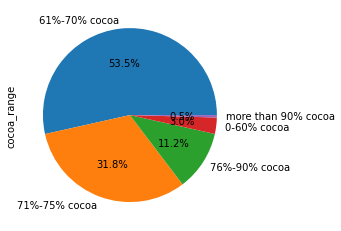

In [34]:
# Visualizing cocoa range result
cocoa_range_1 = df['cocoa_range'].value_counts().plot.pie(autopct = '%1.1f%%')

In [35]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,location_m_rating,cocoa_range
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,3.195662,76%-90% cocoa
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,3.195662,76%-90% cocoa
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,3.195662,76%-90% cocoa
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,3.195662,61%-70% cocoa
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,3.195662,71%-75% cocoa


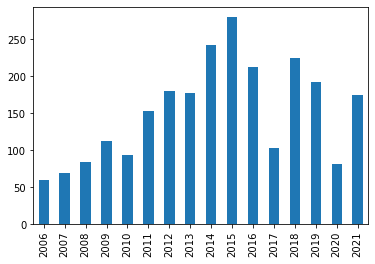

In [36]:
# creating the chart of perpormance of the years
year_performance = df['year_reviewed'].value_counts().sort_index().plot.bar()

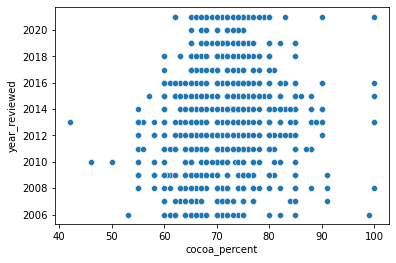

In [37]:
# creating chart for year by cocoa percent
cocoa_by_year = sns.scatterplot(x = 'cocoa_percent', y = 'year_reviewed', data = df,)

In [38]:
#creating subset dataset
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [39]:
np.random.rand(10)

array([0.81961936, 0.48368452, 0.40829508, 0.33722526, 0.5594967 ,
       0.93027048, 0.99508279, 0.8157027 , 0.82657035, 0.64093554])

In [40]:
# Store 70% of the sample in the dataframe big
big = df[dev]

In [41]:
# Store 30% of the sample in the dataframe small
small = df[~dev]

In [42]:
# Total dataset
len(df)

2443

In [43]:
# 30% of dataset
len(small)

742

In [44]:
# 70 % of dataset
len(big)

1701

In [45]:
# Lets see the 30% of dataset result of 'num_ingredients' & 'rating'
df_small = small[['num_ingredients','rating']]

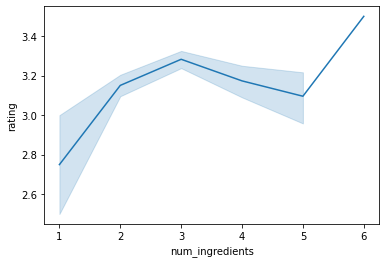

In [46]:
rating_by_ingredients_small = sns.lineplot(data = df_small, x = 'num_ingredients',y = 'rating')

In [47]:
# Lets see the 70% of dataset result of 'num_ingredients' & 'rating'
df_big = big[['num_ingredients','rating']]

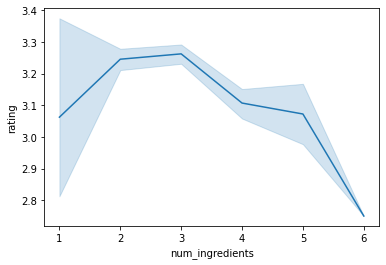

In [48]:
rating_by_ingredients_big = sns.lineplot(data = df_big, x = 'num_ingredients',y = 'rating')

In [49]:
# Lets see the whole dataset result of 'num_ingredients' & 'rating'
df_whole = df[['num_ingredients','rating']]

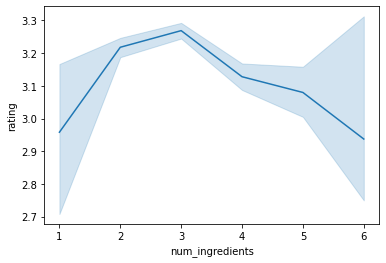

In [50]:
rating_by_ingredients_df = sns.lineplot(data = df_whole, x = 'num_ingredients',y = 'rating')

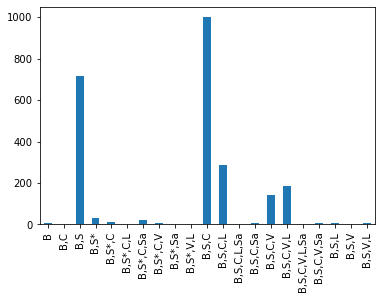

In [51]:
ingredients = df['ingredients'].value_counts().sort_index().plot.bar()

In [52]:
# Creating rating_category variable
df.loc[(df['rating'] > 3.25), 'rating_category'] = 'High rating'

In [53]:
df.loc[(df['rating'] <= 3.25) & (df['rating'] > 2), 'rating_category'] = 'Medium rating'

In [54]:
df.loc[(df['rating'] <= 2.0), 'rating_category'] = 'Low rating'

In [55]:
# Counting each rating category
df['rating_category'].value_counts(dropna = False)

Medium rating    1449
High rating       958
Low rating         36
Name: rating_category, dtype: int64

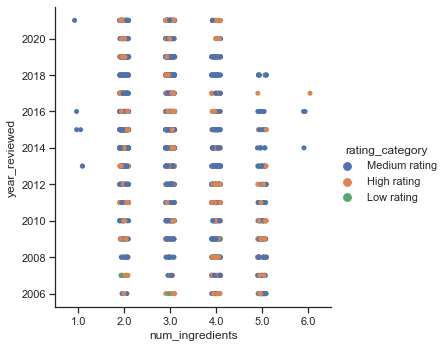

In [56]:
# Create a categorical plot in seaborn using the sales categories

sns.set(style="ticks")
plottwo = sns.catplot(x='num_ingredients', y='year_reviewed', hue='rating_category', data=df)

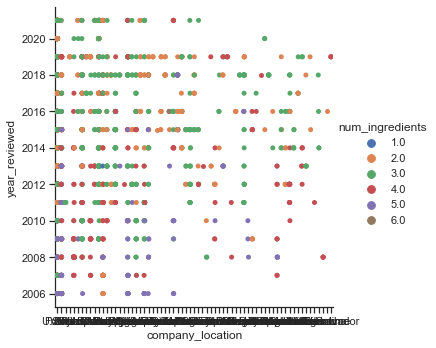

In [57]:
# Create a categorical plot in seaborn using the sales categories

sns.set(style="ticks")
plottwo = sns.catplot(x='company_location', y='year_reviewed', hue='num_ingredients', data=df, legend='full')

Text(0.5, 1.0, 'Relationship of # of ingredients & Year by rating category')

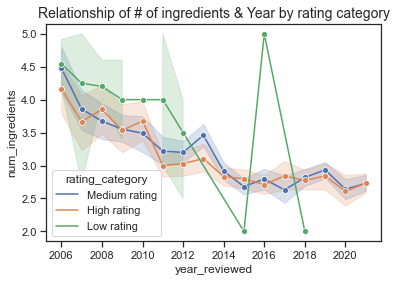

In [58]:
# Create a categorical plot in seaborn using the profit categories

sns.set(style="ticks")
linetwo = sns.lineplot(x='year_reviewed', y='num_ingredients',  hue='rating_category', data=df, marker="o", legend='full',)
plt.title('Relationship of # of ingredients & Year by rating category', fontsize=14, ) # add title

Text(0.5, 1.0, 'Relationship of # of ingredients & Year by rating category')

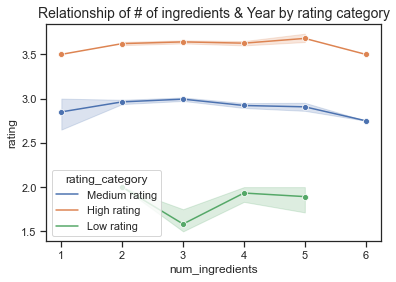

In [59]:
# Create a categorical plot in seaborn using the profit categories

sns.set(style="ticks")
linetwo = sns.lineplot(x='num_ingredients', y='rating',  hue='rating_category', data=df, marker="o", legend='full',)
plt.title('Relationship of # of ingredients & Year by rating category', fontsize=14, ) # add title

In [60]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,location_m_rating,cocoa_range,rating_category
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,3.195662,76%-90% cocoa,Medium rating
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,3.195662,76%-90% cocoa,High rating
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,3.195662,76%-90% cocoa,High rating
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,3.195662,61%-70% cocoa,Medium rating
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,3.195662,71%-75% cocoa,Medium rating


In [61]:
# Creating sub dataset
sub = df[['year_reviewed', 'cocoa_percent', 'num_ingredients', 'rating']]

In [62]:
# Create a correlation matrix using pandas
sub.corr()

,year_reviewed,cocoa_percent,num_ingredients,rating
year_reviewed,1.000000,0.048043,-0.362956,0.087774
cocoa_percent,0.048043,1.000000,-0.187468,-0.077173
num_ingredients,-0.362956,-0.187468,1.000000,-0.098834
rating,0.087774,-0.077173,-0.098834,1.000000


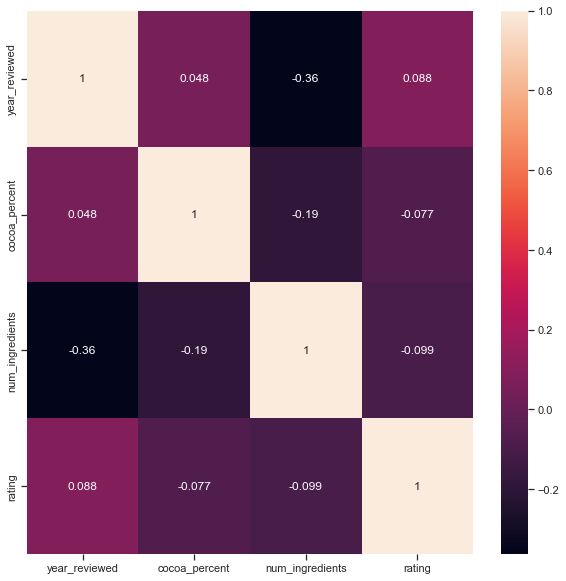

In [63]:
# Create a correlation heatmap using matplotlib
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In [64]:
# Lets see the relationship of all variables
df_pairplot = df[['year_reviewed', 'cocoa_percent', 'num_ingredients', 'rating']]

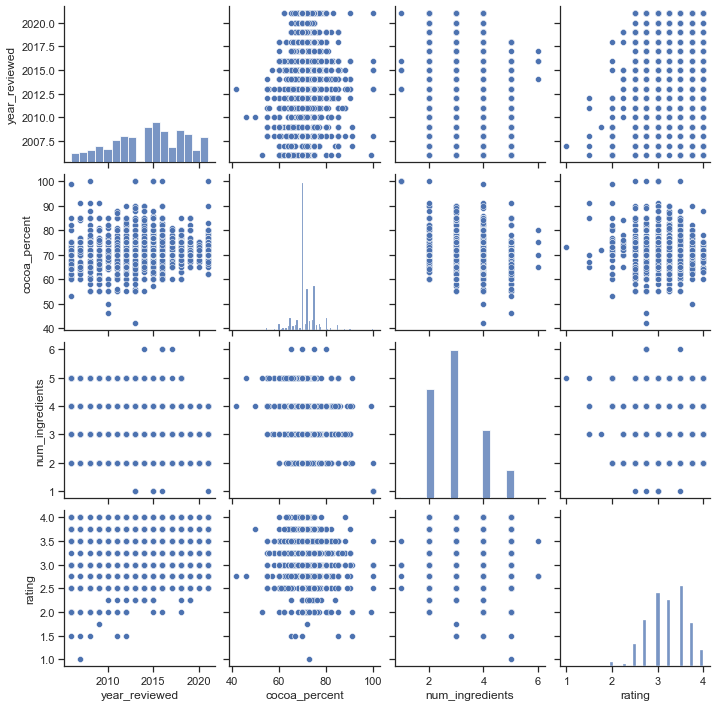

In [65]:
pairplot = sns.pairplot(df_pairplot)

In [66]:
# Lets see the cocoa range status by rating
df_5 = pd.crosstab(df['rating'], df['cocoa_range'], dropna = False)

In [78]:
df_5 = df_5.plot(kind = 'bar', stacked = True)

<AxesSubplot:>

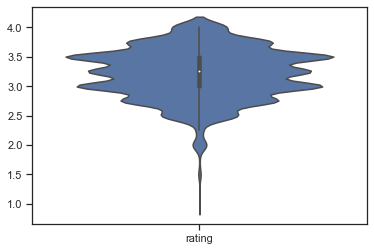

In [72]:
sns.violinplot(data=df[['cocoa_range', 'rating']])

<AxesSubplot:>

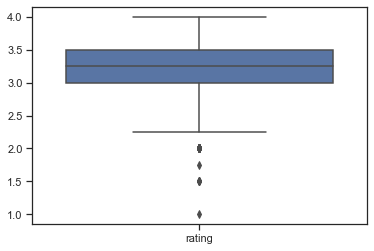

In [73]:
sns.boxplot(data=df[['cocoa_range', 'rating']])

In [68]:
# Exporting cleaned and visualized dataset
df.to_csv(os.path.join(path, 'Data', 'Clean Data', 'choco_clean.csv'))